In [2]:
import warnings
warnings.filterwarnings('ignore')

!pip install -q keras

import os
import pandas as pd
import numpy as np

from google.colab import files

from sklearn.utils import shuffle
from keras.utils import to_categorical

import matplotlib.pyplot as plt

from pylab import rcParams

Using TensorFlow backend.


### 將本機端的 `pkgo_nyc_5class.csv.bz2` 上傳到 colab

In [0]:
if not os.path.exists('pkgo_nyc_5class.csv.bz2'):
    uploaded = files.upload()

### 讀取 `pkgo_nyc_5class.csv.bz2`

In [0]:
pkgo = pd.read_csv('pkgo_nyc_5class.csv.bz2')

### 建構模型

In [0]:
''' Import keras to build a DL model '''
from keras.models import Model, Sequential
from keras.layers import Dense, Activation, LeakyReLU
from keras.optimizers import Adam

def build_model(X):
    model = Sequential()
    model.add(Dense(128, input_dim=X.shape[-1]))
    model.add(Activation('relu'))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dense(5))
    model.add(Activation('softmax'))
    return model

In [0]:
def Xy_split(pkgo):
    num_cols = pkgo.shape[1]
    X = pkgo.iloc[:, :num_cols-1]
    y = pkgo['class']
    
    # 型別轉換，確保資料型態正確
    X = X.astype(np.float32)
    y = y.astype(np.int)
    
    # 對 y 做 one-hot encoding
    y = to_categorical(y)
    
    # 打亂資料集
    X, y = shuffle(X, y)
    
    return X, y

X, y = Xy_split(pkgo)

## 使用 EarlyStopping

In [0]:
n_patience = 5

In [0]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor = 'val_loss', 
                               patience = n_patience, 
                               verbose = 1)

In [9]:
model = build_model(X)
optim = Adam(lr=10e-5)
model.compile(loss='categorical_crossentropy',
              optimizer=optim,
              metrics=['accuracy'])

batch_size=32
epochs = 50

history = model.fit(X, y,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle=True,
                    validation_split=0.1, callbacks=[early_stopping])

Train on 1652 samples, validate on 184 samples
Epoch 1/50
1652/1652 [==============================] - 0s 211us/step - loss: 1.8818 - acc: 0.4776 - val_loss: 1.4044 - val_acc: 0.5109
Epoch 2/50
1652/1652 [==============================] - 0s 66us/step - loss: 1.2979 - acc: 0.5466 - val_loss: 1.2944 - val_acc: 0.5272
Epoch 3/50
1652/1652 [==============================] - 0s 67us/step - loss: 1.2343 - acc: 0.5732 - val_loss: 1.2690 - val_acc: 0.5435
Epoch 4/50
1652/1652 [==============================] - 0s 70us/step - loss: 1.2072 - acc: 0.5860 - val_loss: 1.2589 - val_acc: 0.5380
Epoch 5/50
1652/1652 [==============================] - 0s 66us/step - loss: 1.1686 - acc: 0.5956 - val_loss: 1.2471 - val_acc: 0.5326
Epoch 6/50
1652/1652 [==============================] - 0s 67us/step - loss: 1.1521 - acc: 0.5987 - val_loss: 1.2477 - val_acc: 0.5543
Epoch 7/50
1652/1652 [==============================] - 0s 67us/step - loss: 1.1238 - acc: 0.6114 - val_loss: 1.2213 - val_acc: 0.5543
Epoch 8

1652/1652 [==============================] - 0s 63us/step - loss: 0.9415 - acc: 0.6646 - val_loss: 1.1013 - val_acc: 0.6141
Epoch 23/50
1652/1652 [==============================] - 0s 65us/step - loss: 0.9366 - acc: 0.6653 - val_loss: 1.0689 - val_acc: 0.6196
Epoch 24/50
1652/1652 [==============================] - 0s 67us/step - loss: 0.9295 - acc: 0.6731 - val_loss: 1.0872 - val_acc: 0.6087
Epoch 25/50
1652/1652 [==============================] - 0s 66us/step - loss: 0.9192 - acc: 0.6804 - val_loss: 1.0662 - val_acc: 0.6196
Epoch 26/50
1652/1652 [==============================] - 0s 67us/step - loss: 0.9207 - acc: 0.6864 - val_loss: 1.0488 - val_acc: 0.6304
Epoch 27/50
1652/1652 [==============================] - 0s 65us/step - loss: 0.9236 - acc: 0.6725 - val_loss: 1.1051 - val_acc: 0.6087
Epoch 28/50
1652/1652 [==============================] - 0s 64us/step - loss: 0.9015 - acc: 0.6858 - val_loss: 1.0406 - val_acc: 0.6196
Epoch 29/50
1652/1652 [==============================] - 0s 

1652/1652 [==============================] - 0s 64us/step - loss: 0.8255 - acc: 0.7197 - val_loss: 0.9921 - val_acc: 0.6576
Epoch 44/50
1652/1652 [==============================] - 0s 64us/step - loss: 0.8253 - acc: 0.7185 - val_loss: 0.9897 - val_acc: 0.6522
Epoch 45/50
1652/1652 [==============================] - 0s 65us/step - loss: 0.8095 - acc: 0.7228 - val_loss: 0.9850 - val_acc: 0.6522
Epoch 46/50
1652/1652 [==============================] - 0s 67us/step - loss: 0.8109 - acc: 0.7179 - val_loss: 0.9867 - val_acc: 0.6576
Epoch 47/50
1652/1652 [==============================] - 0s 66us/step - loss: 0.8120 - acc: 0.7209 - val_loss: 0.9993 - val_acc: 0.6467
Epoch 00047: early stopping


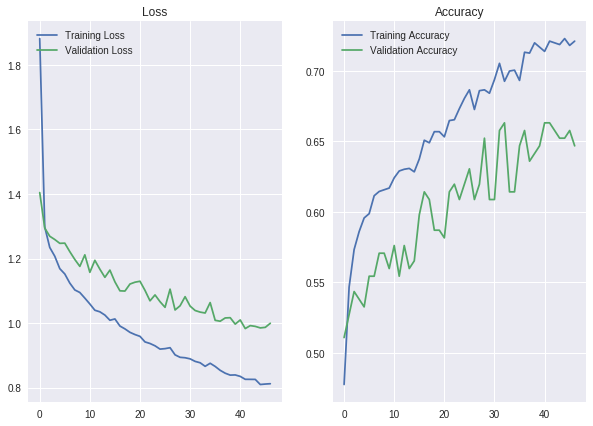

In [10]:
''' Visualize the training/validation loss and training/validation accuracy'''
rcParams['figure.figsize'] = 10, 7

loss = history.history.get('loss')
val_loss = history.history.get('val_loss')

acc = history.history.get('acc')
val_acc = history.history.get('val_acc')
    
plt.figure(0)

plt.subplot(121)

plt.plot(range(len(loss)), loss, label='Training Loss')
plt.plot(range(len(val_loss)), val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.title('Loss')


plt.subplot(122)
plt.plot(range(len(acc)), acc, label='Training Accuracy')
plt.plot(range(len(val_acc)), val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Accuracy')

plt.show()